In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("h100000.csv", names=["time", "io", "type", "sz", "height"])

In [3]:
data

,time,io,type,sz,height
0,2021-05-12T17:03:38.692351Z,I,STATUS,82,-1
1,2021-05-12T17:03:38.699747Z,I,STATUS_MESSAGE,89,-1
2,2021-05-12T17:03:38.701878Z,O,STATUS,82,-1
3,2021-05-12T17:03:38.704212Z,O,STATUS_MESSAGE,89,-1
4,2021-05-12T17:03:39.090670Z,I,STATUS,82,-1
...,...,...,...,...,...
99995,2021-05-12T18:20:57.942337Z,I,PING,1,-1
99996,2021-05-12T18:20:57.942417Z,O,PONG,1,-1
99997,2021-05-12T18:20:58.064457Z,O,PING,1,-1
99998,2021-05-12T18:20:58.250691Z,I,PONG,1,-1


In [4]:
data.describe()

,sz,height
count,100000.000000,1.000000e+05
mean,648.728870,8.270616e+03
std,5617.249267,1.230288e+05
min,1.000000,-1.000000e+00
25%,1.000000,-1.000000e+00
50%,42.000000,-1.000000e+00
75%,89.000000,-1.000000e+00
max,185006.000000,1.838191e+06


In [5]:
pd.pivot_table(data, values=["sz"], index=["type"], columns=["io"], aggfunc=np.sum)

sz          
io                                       I         O
type                                                
BLOCK_HASH_REQUEST_MESSAGE             NaN    1386.0
BLOCK_HASH_RESPONSE_MESSAGE         4576.0       NaN
BLOCK_HEADERS_REQUEST_MESSAGE          NaN    4573.0
BLOCK_HEADERS_RESPONSE_MESSAGE  17377839.0       NaN
BLOCK_MESSAGE                    2595739.0       NaN
BODY_REQUEST_MESSAGE                   NaN  739462.0
BODY_RESPONSE_MESSAGE           39069686.0    3030.0
DISCONNECT                          4940.0       NaN
GET_BLOCK_MESSAGE                     38.0   15504.0
NEW_BLOCK_HASHES                  166797.0       NaN
PING                               10035.0   10034.0
PONG                               10025.0   10035.0
SKELETON_REQUEST_MESSAGE               NaN     638.0
SKELETON_RESPONSE_MESSAGE          40988.0       NaN
STATUS                            202786.0  202622.0
STATUS_MESSAGE                    266201.0  326452.0
TRANSACTIONS                     3809501.0       NaN

In [6]:
pd.pivot_table(data, values=["sz"], index=["type"], aggfunc=np.sum)

,sz
type,
BLOCK_HASH_REQUEST_MESSAGE,1386
BLOCK_HASH_RESPONSE_MESSAGE,4576
BLOCK_HEADERS_REQUEST_MESSAGE,4573
BLOCK_HEADERS_RESPONSE_MESSAGE,17377839
BLOCK_MESSAGE,2595739
BODY_REQUEST_MESSAGE,739462
BODY_RESPONSE_MESSAGE,39072716
DISCONNECT,4940
GET_BLOCK_MESSAGE,15542


<AxesSubplot:xlabel='time'>

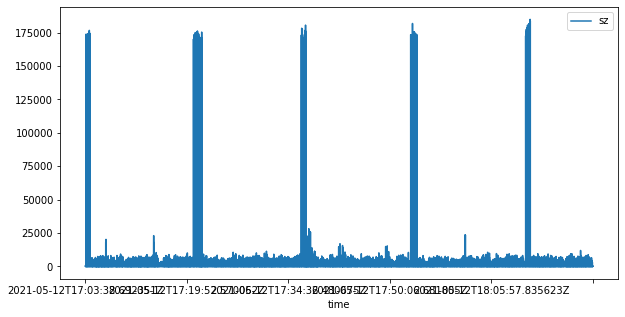

In [7]:
data.plot(x="time", y="sz", figsize=(10,5))